##### 홈페이지를 로컬에 파일로 저장하는 법

In [3]:
import urllib
request = urllib.request.Request('https://www.naver.com')
data = urllib.request.urlopen(request).read() #byte형식
file = open('pc.html','wb') #binary 로 저장
file.write(data)
file.close()


<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메
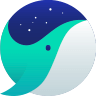
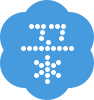

In [7]:
with open('pc.html','rb') as file : open_file = file.read().decode('utf-8')
print(open_file)

##### BeautifulSoup Module

    * 홈페이지 내 데이터를 쉽게 추출할 수 있게 해주는 파이썬 외부 라이브러리
    * 웹 문서 내 수많은 HTML 태그들을 parser를 활용해 사용하기 편한 파이썬 객체로 만들어 제공한다.
    * 웹문서 구조를 알고 있다면 편하게 데이터를 뽑아 활용할 수 있음.

In [32]:
from bs4 import BeautifulSoup
html = """
<html>
<head>
<body>
  <h1>스크레이핑이란?</h1>
  <p>웹 페이지를 분석하는 것</p>
  <p>원하는 부분을 추출하는 것</p>
</body>
</html>
"""

soup = BeautifulSoup(html, 'html.parser')
print(soup)
h1 = soup.body.h1
print(h1)
print(h1.string)
print(h1.text)    # string / text 에는 차이가 존재.    dom model

p1 = soup.body.p
print(p1.string)

p2 = p1.next_sibling.next_sibling       #next_sibling은 하나의 space로 봄.
print(p2.string)

# p3 = p1.find_next_sibling
# print(p3.string)


<html>
<head>
<body>
<h1>스크레이핑이란?</h1>
<p>웹 페이지를 분석하는 것</p>
<p>원하는 부분을 추출하는 것</p>
</body>
</head></html>

<h1>스크레이핑이란?</h1>
스크레이핑이란?
스크레이핑이란?
웹 페이지를 분석하는 것
원하는 부분을 추출하는 것


###### find
    * find() : HTML 태그에 대한 첫 번째 정보를 가져온다.
    - find(속성 = '값') : HTML 해당 속성과 일치하는 값에 대한 첫 번째 정보를 가져옴
    pridiot.tistory.com/6 참고

id로 요소를 찾는 방법

In [18]:
from bs4 import BeautifulSoup
html = """
<html>
<head>
<body>
  <h1 id='title'>스크레이핑이란?</h1>
  <p id ='body'>웹 페이지를 분석하는 것</p>
  <p>원하는 부분을 추출하는 것</p>
</body>
</html>
"""
#h1,p 에 속성부여 id='Value'
soup = BeautifulSoup(html,'html.parser')
title = soup.find(id='title')
body = soup.find(id='body')

print(title.string)
print(body.string)

스크레이핑이란?
웹 페이지를 분석하는 것


In [19]:
from bs4 import BeautifulSoup
html = """
<html><body>
  <ul>
    <li><a href="http://www.naver.com">naver</a></li>
    <li><a href="http://www.daum.net">daum</a></li>
  </ul>
</body></html>
"""
#div = division - 줄바꿈  
#span = 한줄에 나타낼 때 -줄바꿈 X
#ul = 순서가 없는 리스트
soup = BeautifulSoup(html,'html.parser')
links = soup.find_all('a') # a : hyperlink
for a in links:
    href = a.attrs['href'] #attrs : attributes
    text = a.string
    print(text, ">", href)

naver > http://www.naver.com
daum > http://www.daum.net


In [20]:
find('title')
find('wf')


NameError: name 'find' is not defined

In [24]:
import urllib
request = urllib.request.Request("https://www.weather.go.kr/weather/forecast/mid-term-rss3.jsp")
file = open('weather.html','wb')
file.write(data)
file.close()
with open('weather.html','rb') as file: html = file.read().decode('utf-8')
print(html)

TypeError: a bytes-like object is required, not '_io.BufferedWriter'

In [22]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html,'html.parser')
title = soup.find('title').string
wf = soup.find('wf').string
print(title)
# print(wf)

AttributeError: 'NoneType' object has no attribute 'string'

##### find_all():
    
    - HTML의 해당 태그에 대한 모든 정보를 리스트 형식으로 가져옴. limit 옵션으로 개수를 지정 가능.
    - CSS 속성으로 필터링(class_(생략가능)로 클래스를 직접 사용한다.혹은 attrs 에서 속성 = 값으로 필터링)
    

In [21]:
import requests
from bs4 import BeautifulSoup
req = requests.get('https://www.naver.com') #request할떈 text
html = req.text
soup = BeautifulSoup(html,'html.parser') #lxml 은 install 해야됨.
result1 = soup.find_all('a', class_='link_set')
result2 = soup.find_all('a',class_="_2aeXMlrb")
print(result1)
print(result2)

[<a class="link_set" data-clk="top.mkhome" href="https://help.naver.com/support/welcomePage/guide.help" id="NM_set_home_btn">네이버를 시작페이지로</a>]
[<a class="_2aeXMlrb BMgpjddw" data-clk="dropdownload1b" href="https://installer-whale.pstatic.net/downloads/banner/RydDy7/WhaleSetup.exe" id="NM_whale_download_btn"><span style="background-color: #44388e">다운로드</span></a>]


In [32]:
print(soup.title)
print(soup.title.name)
print(soup.title.string)
print(soup.img) #alt == img 속성
print(soup.img['alt']) # 공백출력 - 속성
print(soup.a)
print(soup.a['href'])
print(soup.a.string)


<title>NAVER</title>
title
NAVER
<img alt="" height="49" src="https://static-whale.pstatic.net/main/img_darkmode_v3@2x.png" style="padding-left: 92px" width="215.5"/>

<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>
#newsstand
뉴스스탠드 바로가기


In [81]:
# print(soup.find_all('a')) #대량검색
# print(soup.find_all('a',limit=2)) #2개로 제한
# print(soup.find_all('a')[413]) #인덱스 부여  #개수  -len
# print(soup.find_all('div')) #대량검색
# print(soup.find_all('div',id='u_skip')) #id값 추출
# print(soup.find_all('span',class_='blind',limit=2)) #limit --> 상위 2개
# print(soup.find_all('span',attrs={'class':['blind','item']},limit=2))
print(soup.find_all('span',attrs={'class':['blind' and 'item']}))

[<span class="item">추첨 @13@.</span>, <span class="item">지급기한 1년</span>, <span class="item"><i class="imsc ico_arr"></i>@8@(@9@%)</span>, <span class="item">@7@, @message@</span>, <span class="item">@5@</span>]


In [61]:
import re
print(soup.find_all(string='네이버'))
print(soup.find_all(string=re.compile('네이버')))

['네이버']
['네이버', '네이버를 시작페이지로', '쥬니어네이버', '네이버뉴스', '언론사가 직접 편집한 뉴스들을 네이버 홈에서 바로 보실 수 있습니다.', '네이버 연애·결혼', '네이버 연애결혼', '네이버 연애결혼', '네이버 연애결혼', '네이버 연애결혼', '네이버 연애결혼', '네이버 연애결혼', '네이버 연애결혼', '네이버 연애결혼', '네이버 연애결혼', '네이버 연애결혼', '네이버 연애결혼', '안녕하세요오ෆ 히오나스입니다. 지난주 화요일이 결혼 2주년이었는데요 벌써 두 번째 결혼기념일 👩❤️👨 시간 진짜 빨라요!!! 왕 즐거운 하루를 보냈답니다 시-작 네이버 시계 보면서 목 빠지게 기다린 12:00AM 늘 반가운 러브데이 알림 ❤️ 올해부터는 우리 봉이도 함께 축하하는 결혼기념일 결혼기념일엔 결혼식 사진 봐줘야지용 오빠 턱시도 너무 잘 어울린', '네이버 연애결혼', '네이버 개발자 센터', '네이버 D2', '네이버 D2SF', '네이버 랩스', '네이버 정책 및 약관', '네이버 정책']


##### select_one(), select()
    - CSS 선택자를 활용하여 원하는 정보를 가져옴(태그를 검색하는 find, find_all과 비슷함)
    - class는 dot(.)으로 id는 # 로 표시.

In [109]:
from bs4 import BeautifulSoup
html = """
<html>
<body>
<div id="meigen">
  <h1>위키북스 도서</h1>
  <ul class="items">
    <li>유니티 게임 이펙트 입문</li>
    <li>스위프트로 시작하는 아이폰 앱 개발 교과서</li>
    <li>모던 웹사이트 디자인의 정석</li>
  </ul>
</div>
</body>
</html>
"""

soup = BeautifulSoup(html,'html.parser')
h1 = soup.select_one('div#meigen > h1').string
print(h1)
li_list = soup.select('div#meigen > ul.items >li')
for li in li_list:
    print(li.string)

위키북스 도서
유니티 게임 이펙트 입문
스위프트로 시작하는 아이폰 앱 개발 교과서
모던 웹사이트 디자인의 정석


Q . 네이버 원화환율 가져와서 출력하기

In [114]:
import urllib.request as req
from bs4 import BeautifulSoup
url = 'https://finance.naver.com/marketindex/'
res = req.urlopen(url)
soup = BeautifulSoup(res,'html.parser')
find = soup.select_one('span.value')
print('usd/krw =',find.string)

usd/krw = 1,132.00


In [31]:
from bs4 import BeautifulSoup
import urllib.request as req
fp = open('crawling/fruits-vegetables.html',encoding='utf-8')
soup = BeautifulSoup(fp,'html.parser')
soup
# print(soup.select_one('ul#fr-list>li.yellow').string)


<html>
<body>
<div id="main-goods" role="page">
<h1>과일과 야채</h1>
<ul id="fr-list">
<li class="red green" data-lo="ko">사과</li>
<li class="purple" data-lo="us">포도</li>
<li class="yellow" data-lo="us">레몬</li>
<li class="yellow" data-lo="ko">오렌지</li>
</ul>
<ul id="ve-list">
<li class="white green" data-lo="ko">무</li>
<li class="red green" data-lo="us">파프리카</li>
<li class="black" data-lo="ko">가지</li>
<li class="black" data-lo="us">아보카도</li>
<li class="white" data-lo="cn">연근</li>
</ul>
</div>
</body>
</html>

In [53]:
import re
print(soup.select_one('ul#fr-list>li.yellow[data-lo="ko"]').string)
print(soup.select_one('ul#fr-list>li.red').string)
print(soup.select_one('#ve-list>li:nth-of-type(5)').string) #:nth-of-type(?) ? 번째

print(soup.select_one('ul#ve-list>li.black[data-lo="us"]').string)
print(soup.select_one('ul#ve-list>li:nth-of-type(4)').string)
print(soup.select('ul#ve-list>li.black')[1].string)
print(soup.find_all('li',attrs={'class':'black','data-lo':"us"})[0].string)
cond = {'class':'black','data-lo':"us"}
print(soup.find(attrs={'class':'black','data-lo':"us"}).string)
print(soup.find(id="ve-list").find("li",cond).string)

오렌지
사과
연근
아보카도
아보카도
아보카도
아보카도
아보카도
아보카도


##### Q .
    BeautifulSoup와 re를 이용해서 https가 포함된 url만 출력하세요

In [66]:
from bs4 import BeautifulSoup
import re
html="""
<ul>
  <li><a href="hoge.html">hoge</li>
  <li><a href="https://example.com/fuga">fuga*</li>
  <li><a href="https://example.com/foo">foo*</li>
  <li><a href="http://example.com/aaa">aaa*</li>
</ul>
  """
soup = BeautifulSoup(html,'html.parser')

comp = re.compile("^https://")
list_find = soup.find_all('a',attrs={'href':comp})   #  a href ==> tag: a, hyperlink == href

# list_find=soup.find_all(href=re.compile('^https'))   # 위 2줄을 하나로 

print(list_find)
for find in list_find:
    print(find['href'])

[<a href="https://example.com/fuga">fuga*</a>, <a href="https://example.com/foo">foo*</a>]
https://example.com/fuga
https://example.com/foo


    Q. https://www.naver.com 에서 <a href~>바로가기 출력

In [ ]:
import urllib.request as req
from bs4 import BeautifulSoup
url = 'https://www.naver.com'
res = req.urlopen(url)
soup = BeautifulSoup(res,'html.parser').decode('utf-8') #split을 하고 싶으면 decode!
# find = soup.split('"#newsstand"')[1]rt


    Q. 네이버 영화 랭킹 가져와서 첫번째

In [117]:
import urllib.request as req
from bs4 import BeautifulSoup
url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn'
res = req.urlopen(url)
soup = BeautifulSoup(res,'html.parser').decode('utf-8')
# print(soup.select_one(attrs='발신제한').string)
find = soup.split('title="발신제한"')[1]
print(find.split())

In [ ]:
import requests
from bs4 import BeautifulSoup
req - requests.get('https://naver.com')
html = req.text
soup = BeautifulSoup(html,'lxml')
print(soup.sele)